<a href="https://colab.research.google.com/github/StupidSmile/DeepSeek-R1/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [17]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [18]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [19]:
# Create the data parameters
weight=0.3
bias=0.9
# Make X and y using linear regression feature
start=0
end=1
stop=0.01

X = torch.arange(start, end, stop)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [20]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

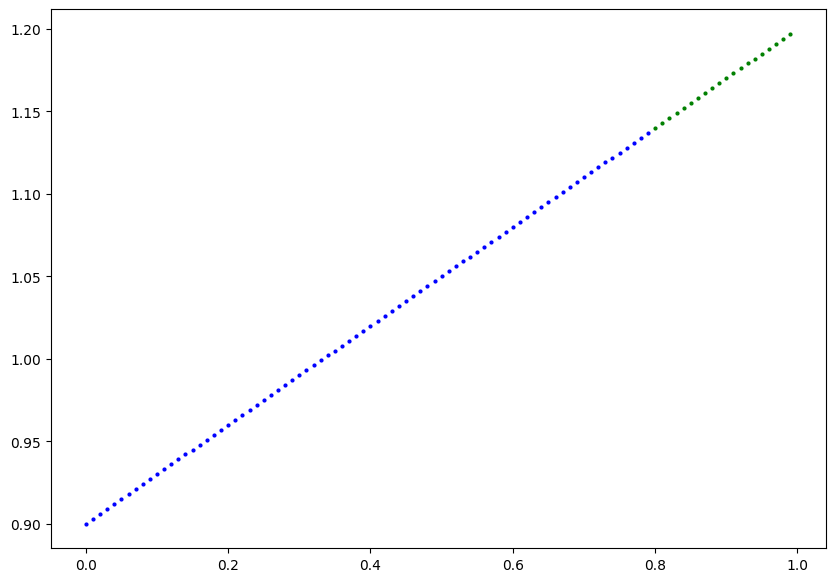

In [39]:
# Plot the training and testing data
def plot_predictions(X_train,X_test, y_train, y_test, predictions=None): # Added predictions=None as a default parameter
  plt.figure(figsize=(10,7))

  plt.scatter(X_train, y_train , c="b", s=4,label= "Training data")

  plt.scatter(X_test, y_test ,c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(X_test, predictions,c="r", s=4, label="Predictions")

plot_predictions(X_train,X_test, y_train, y_test);

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [45]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch
import torch.nn as nn # Import nn explicitly

class LinearRegressionModel(nn.Module): # Inherit from nn.Module
  def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              dtype=torch.float,
                                              requires_grad=True))
      self.bias = nn.Parameter(torch.randn(1,
                                              dtype=torch.float,
                                              requires_grad=True))
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [47]:
# Instantiate the model and put it to the target device
RANDOM_SEED =42
torch.manual_seed(RANDOM_SEED)

model= LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [49]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [51]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [58]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs=1000

# Send data to target device
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

  # Put model in evaluation mode and setup inference context
   model.eval()
    # 1. Forward pass
   test_pred = model(X_test)
      # 2. Calculate test loss
   test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.004 | Test loss: 0.006
Epoch: 1 | Train loss: 0.008 | Test loss: 0.006
Epoch: 2 | Train loss: 0.004 | Test loss: 0.006
Epoch: 3 | Train loss: 0.008 | Test loss: 0.006
Epoch: 4 | Train loss: 0.004 | Test loss: 0.006
Epoch: 5 | Train loss: 0.008 | Test loss: 0.006
Epoch: 6 | Train loss: 0.004 | Test loss: 0.006
Epoch: 7 | Train loss: 0.008 | Test loss: 0.006
Epoch: 8 | Train loss: 0.004 | Test loss: 0.006
Epoch: 9 | Train loss: 0.008 | Test loss: 0.006
Epoch: 10 | Train loss: 0.004 | Test loss: 0.006
Epoch: 11 | Train loss: 0.008 | Test loss: 0.006
Epoch: 12 | Train loss: 0.004 | Test loss: 0.006
Epoch: 13 | Train loss: 0.008 | Test loss: 0.006
Epoch: 14 | Train loss: 0.004 | Test loss: 0.006
Epoch: 15 | Train loss: 0.008 | Test loss: 0.006
Epoch: 16 | Train loss: 0.004 | Test loss: 0.006
Epoch: 17 | Train loss: 0.008 | Test loss: 0.006
Epoch: 18 | Train loss: 0.004 | Test loss: 0.006
Epoch: 19 | Train loss: 0.008 | Test loss: 0.006
Epoch: 20 | Train loss: 0.004 

In [62]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs=1000

# Send data to target device
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # for plotting the loss
  train_loss_values.append(loss.item())

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model.eval()
    # 1. Forward pass
    test_pred = model(X_test)
    # 2. Calculate test loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    # for plotting the loss
    test_loss_values.append(test_loss.item())
    epoch_count.append(epoch) # for plotting the loss against epoch number

    #

In [63]:
model.state_dict()

OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

ValueError: x and y must have same first dimension, but have shapes (1,) and (1000,)

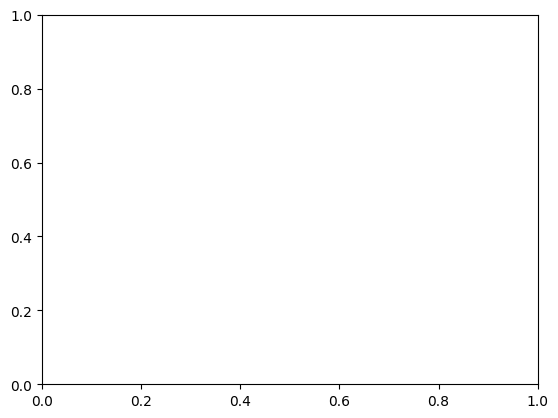

In [64]:
# Plot the loss curves
plt.plot(epochs, train_loss_values, label="Train loss")
plt.plot(epochs, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [66]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [68]:
# Make predictions with the model
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model(X_test)
y_preds

tensor([1.1464, 1.1495, 1.1525, 1.1556, 1.1587, 1.1617, 1.1648, 1.1679, 1.1709,
        1.1740, 1.1771, 1.1801, 1.1832, 1.1863, 1.1893, 1.1924, 1.1955, 1.1985,
        1.2016, 1.2047])

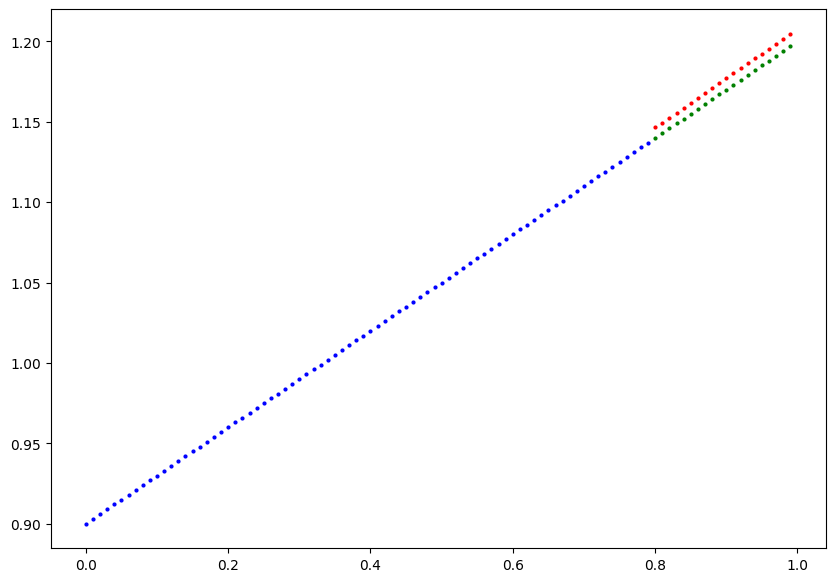

In [70]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(X_train, X_test, y_train, y_test, predictions=y_preds) # Pass X_train, X_test, y_train, and y_test

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory


# 2. Create model save path

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
